In [17]:
import pandas as pd

# Define the file path and name
file_path = r'D:\Fraud_Analytics\fa1\Payments.csv'

# Use pandas to read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Sender  Receiver  Amount
0    1309      1011  123051
1    1309      1011  118406
2    1309      1011  112456
3    1309      1011  120593
4    1309      1011  166396


In [4]:
import networkx as nx

# Assuming df is your DataFrame with columns 'Sender', 'Receiver', 'Amount'

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights
for _, row in df.iterrows():
    G.add_edge(row['Sender'], row['Receiver'], weight=row['Amount'])

# Now G is a weighted graph representing the transactions

In [5]:
# Assuming G is your graph

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"The graph has {num_nodes} nodes and {num_edges} edges.")

The graph has 799 nodes and 5358 edges.


In [6]:
import numpy as np
import networkx as nx
from scipy.sparse import csgraph
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# Assuming G is your graph and df is your DataFrame

# Step 1: Construct the adjacency matrix
adjacency_matrix = nx.to_numpy_array(G)

# Step 2: Construct the degree matrix
degree_matrix = np.diag([G.degree(n) for n in G.nodes()])

# Step 3: Compute the Laplacian matrix
laplacian_matrix = degree_matrix - adjacency_matrix

# Step 4: Compute the eigenvectors of the Laplacian matrix
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)

# Step 5: Select the k smallest eigenvectors
# Assuming k is the number of clusters you want
k = 3
indices = np.argsort(eigenvalues)[:k]
smallest_eigenvectors = np.real(eigenvectors[:, indices])

# Step 6: Form a matrix with these k eigenvectors as columns
matrix = np.column_stack([smallest_eigenvectors])

# Step 7: Normalize the rows of the matrix
normalized_matrix = normalize(matrix, axis=1)

# Step 8: Treat each row as a point in k-dimensional space and cluster them using k-means
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(normalized_matrix)

# Now, clusters[i] is the cluster of node i
# Now, clusters[i] is the cluster of node i

In [7]:
print(adjacency_matrix)

[[     0. 170398.      0. ...      0.      0. 166888.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0. 113249.      0. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...   5600.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]]


In [12]:
# Print the clusters and their sizes
for i in range(k):
    cluster_nodes = [node for node, cluster in enumerate(clusters) if cluster == i]
    print(f"Cluster {i+1}:")
    print(cluster_nodes)
    print(f"Number of nodes in cluster {i+1}: {len(cluster_nodes)}\n")

Cluster 1:
[7, 8, 9, 10, 11, 25, 26, 27, 29, 141, 143, 244, 249, 251, 255, 277, 333, 335, 370, 371, 383, 384, 385, 408, 416, 424, 431, 432, 433, 434, 435, 436, 438, 439, 440, 441, 442, 443, 444, 445, 447, 449, 461, 462, 467, 475, 477, 480, 481, 482, 484, 492, 497, 498, 499, 500, 502, 503, 521, 526, 529, 530, 531, 532, 533, 534, 535, 537, 538, 541, 542, 543, 544, 545, 546, 547, 548, 561, 562, 563, 564, 565, 567, 580, 583, 584, 585, 586, 587, 588, 589, 590, 591, 594, 595, 596, 598, 602, 603, 614, 615, 616, 618, 622, 627, 636, 637, 639, 640, 643, 644, 645, 646, 647, 653, 654, 657, 658, 660, 662, 665, 666, 668, 671, 672, 673, 674, 675, 676, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 691, 692, 694, 695, 696, 697, 698, 704, 705, 706, 708, 711, 713, 714, 715, 716, 717, 718, 719, 724, 725, 726, 729, 730, 731, 732, 733, 734, 735, 736, 737, 739, 740, 745, 746, 748, 749, 750, 753, 754, 755, 756, 758, 759, 760, 761, 762, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 775, 776, 778, 

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(normalized_matrix, clusters)
db_score = davies_bouldin_score(normalized_matrix, clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {db_score}')

Silhouette Score: 0.7117530442541823
Davies-Bouldin Score: 0.40411213370923055


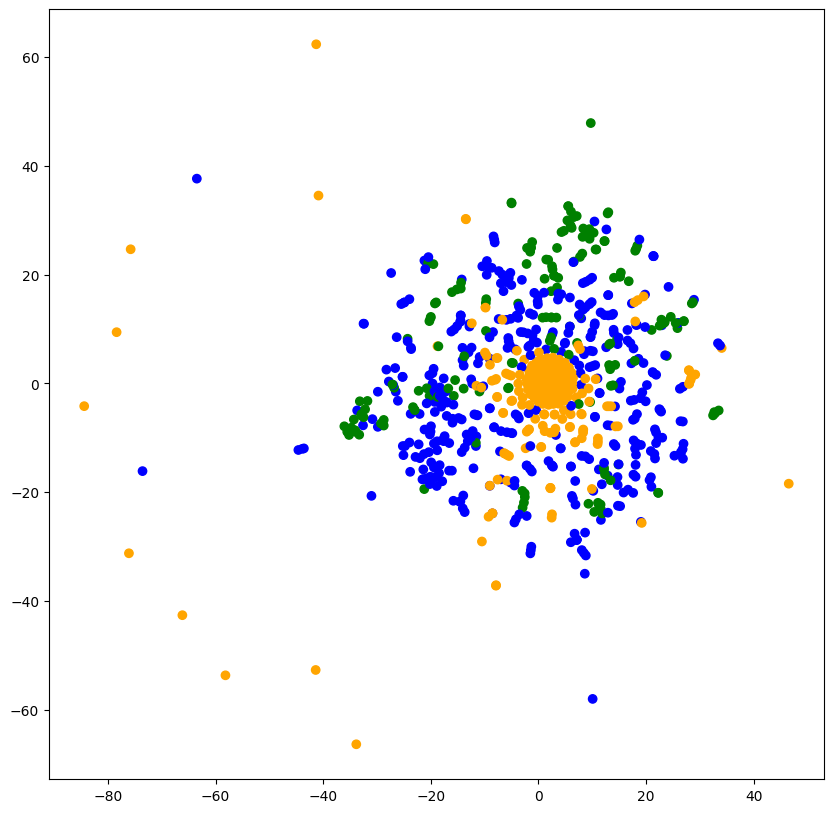

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define a new color scheme
colors = ['orange', 'blue', 'green']  # Add more colors if there are more clusters

# Create node colors
node_colors = [colors[cluster] for cluster in clusters]

# Create a layout for the nodes using t-SNE
tsne = TSNE(n_components=2)
layout = tsne.fit_transform(nx.adjacency_matrix(G).toarray())

# Extract x and y coordinates
x = layout[:, 0]
y = layout[:, 1]

# Increase the figure size
plt.figure(figsize=(10, 10))

# Draw the scatter plot
plt.scatter(x, y, c=node_colors)

# Show the plot
plt.show()

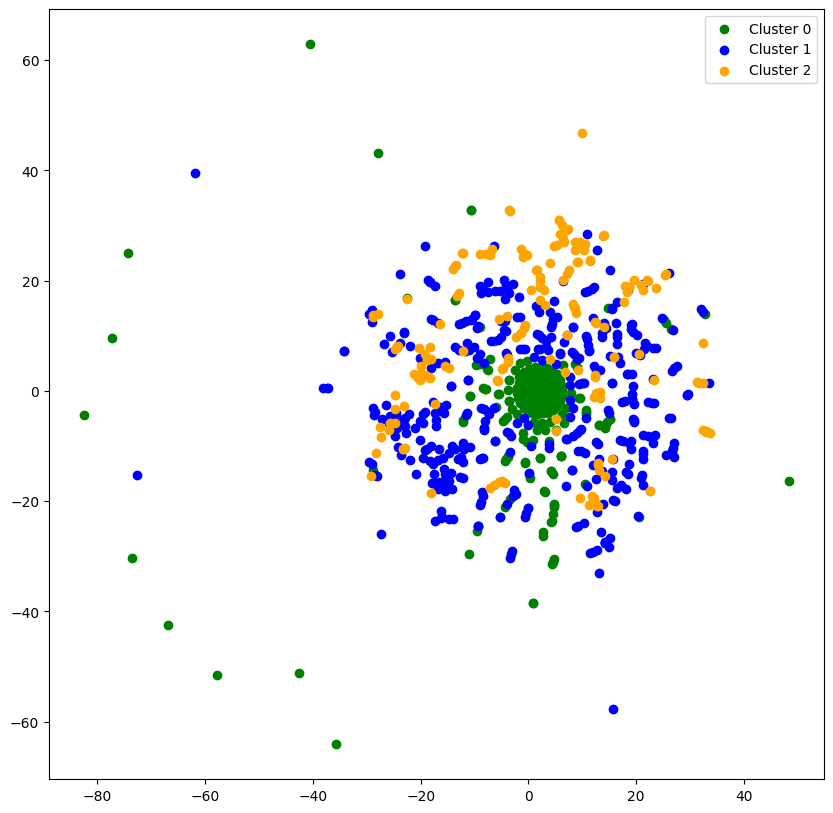

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define a new color scheme
colors = ['green', 'blue', 'orange']   # Add more colors if there are more clusters

# Create a layout for the nodes using t-SNE
tsne = TSNE(n_components=2)
layout = tsne.fit_transform(nx.adjacency_matrix(G).toarray())

# Increase the figure size
plt.figure(figsize=(10, 10))

# Draw the scatter plot for each cluster
for i, color in enumerate(colors):
    # Get the nodes in this cluster
    x = layout[clusters == i, 0]
    y = layout[clusters == i, 1]
    
    # Draw the scatter plot for this cluster
    plt.scatter(x, y, c=color, label=f'Cluster {i}')

# Create a legend
plt.legend()

# Show the plot
plt.show()

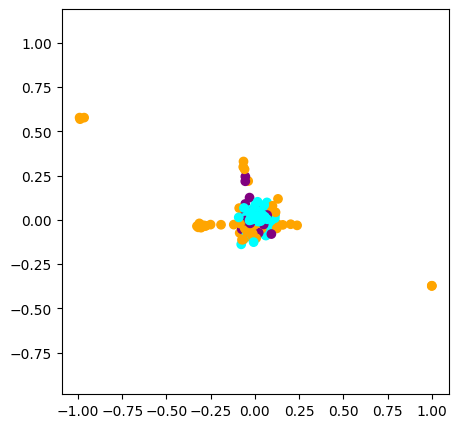

In [63]:
import matplotlib.pyplot as plt

# Define a new color scheme
colors = ['purple', 'orange', 'cyan']  # Add more colors if there are more clusters

# Create node colors
node_colors = [colors[cluster] for cluster in clusters]

# Create a layout for the nodes 
layout = nx.spring_layout(G)

# Extract x and y coordinates
x = [pos[0] for pos in layout.values()]
y = [pos[1] for pos in layout.values()]

# Decrease the figure size
plt.figure(figsize=(5, 5))

# Draw the scatter plot
plt.scatter(x, y, c=node_colors)

# Set equal scaling in the x and y axes
plt.axis('equal')

# Show the plot
plt.show()

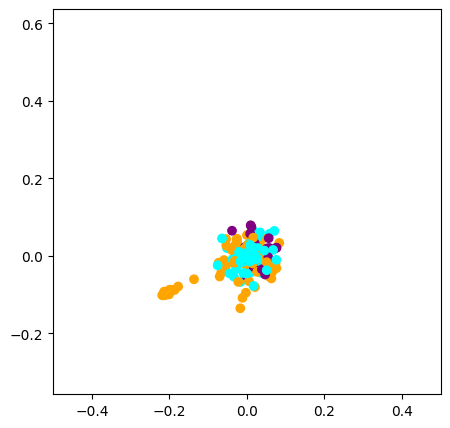

In [64]:
import matplotlib.pyplot as plt

# Define a new color scheme
colors = ['purple', 'orange', 'cyan']  # Add more colors if there are more clusters

# Create node colors
node_colors = [colors[cluster] for cluster in clusters]

# Create a layout for the nodes 
layout = nx.spring_layout(G)

# Extract x and y coordinates
x = [pos[0] for pos in layout.values()]
y = [pos[1] for pos in layout.values()]

# Decrease the figure size
plt.figure(figsize=(5, 5))

# Draw the scatter plot
plt.scatter(x, y, c=node_colors)

# Set equal scaling in the x and y axes
plt.axis('equal')

# Set x-axis limits
plt.xlim(-0.50, 0.50)

# Show the plot
plt.show()